In [3]:
import numpy as np
from netCDF4 import Dataset
import itertools
import matplotlib.pyplot as plt
from matplotlib import gridspec
from brokenaxes import brokenaxes
import warnings
warnings.filterwarnings("ignore")

In [4]:
datapath = '/Users/carmennab/Dropbox/met_office/data/experiments/FOAM_grid/'
ctrl = np.array(Dataset(datapath+'rosie_UCL_CTL_NOSIT_ASSIM_r243541_dcarneir.nc')['sivolu'])
base = np.array(Dataset(datapath+'rosie_UCL_BASELINE_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_r243541_dcarneir.nc')['sivolu'])
nine = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA09_r243541_dcarneir.nc')['sivolu'])
six = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA06_r243541_dcarneir.nc')['sivolu'])
larm = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_BRISTOL_SNFOAM_ALPHA1_r243541_dcarneir.nc')['sivolu'])
cpom = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_CPOM_SNFOAM_ALPHA1_r243541_dcarneir.nc')['sivolu'])
smlg = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNLG_ALPHA1_r243541_dcarneir.nc')['sivolu'])
awi = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNAWI_ALPHA1_r243541_dcarneir.nc')['sivolu'])
unc = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_NEW_OBERR_r243541_dcarneir.nc')['sivolu'])

names = ['CTRL','BASE','\u03B1_0.9', '\u03B1_0.6','FB_LARM','FB_CPOM','SN_SMLG','SN_AWI','UNC']
sits = [ctrl, base, nine, six, larm, cpom, smlg, awi, unc]
colors = ['blue','red','#e7298a','green','purple','#ff7f00','brown','black', 'c']
buoy_xs = [1106,1126,1114]
buoy_ys = [476,459,502]

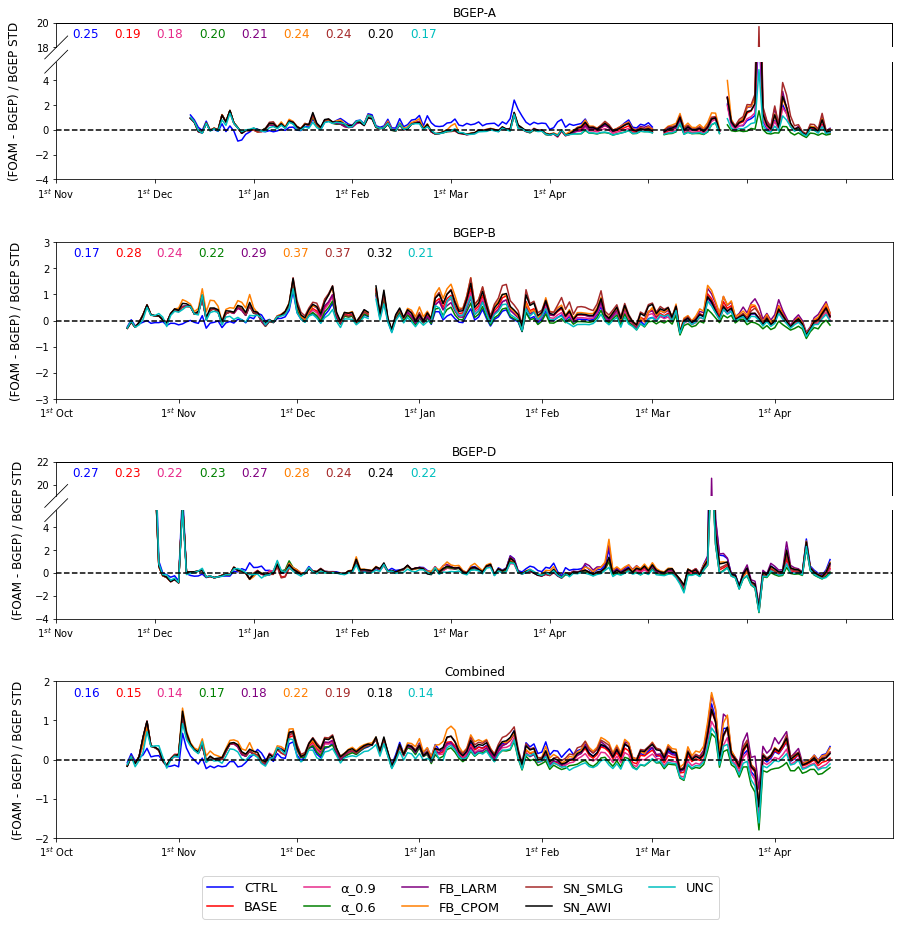

In [5]:
buoys = ['a','b','d']
buoy_names = ['BGEP-A','BGEP-B','BGEP-D']

fig = plt.figure(figsize=(15,15))
spec = gridspec.GridSpec(ncols=1, nrows=4, wspace=0.25, hspace=0.4)
days = np.arange(0,212)

ys = [0.866,0,0.46]
pads = [36,12,32,10]

### plot buoys seperately
for count, buoy in enumerate(buoys):
    
    bgep = np.asarray(Dataset('/Users/carmennab/Dropbox/met_office/data/validation/BGEP/'+buoy+
                              '_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
    std = np.asarray(Dataset('/Users/carmennab/Dropbox/met_office/data/validation/BGEP/'+buoy+
                             '_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
    std[np.isnan(bgep)]=np.nan

    if count == 0:
        xs = [0.14,0.179, 0.218, 0.257, 0.296, 0.335, 0.374, 0.413, 0.453]
        ax = brokenaxes(ylims=((-4, 5.5), (18, 20)), hspace=0.2, subplot_spec=spec[count])
        for c, sit in enumerate(sits):
            s = sit[:,buoy_xs[count],buoy_ys[count]]
            ax.plot(days,(s-bgep)/std,label=names[c],color=colors[c])  
            ax.axhline(20,color='k')
            ax.axvline(212,color='k')
            diff = s - bgep
            error = np.round(np.nanmean(np.abs(diff)),2)
            fig.text(xs[c], ys[count], '%.2f' %error, ha='left',fontsize = 12,color=colors[c])
             
    elif count == 1:
        xs = [0.02, 0.07, 0.12, 0.17, 0.22, 0.27, 0.32, 0.37, 0.42, 0.47, 0.52]
        ax = fig.add_subplot(spec[count])

        for c, sit in enumerate(sits):
            s = sit[:,buoy_xs[count],buoy_ys[count]]
            ax.plot(days,(s-bgep)/std,label=names[c],color=colors[c])
            ax.set_ylim(-3,3)
            diff = s - bgep
            error = np.round(np.nanmean(np.abs(diff)),2)
            ax.text(xs[c], 0.91, '%.2f' %error, ha='left',fontsize = 12,color=colors[c],transform = ax.transAxes)
            
    elif count == 2:
        xs = [0.14,0.179, 0.218, 0.257, 0.296, 0.335, 0.374, 0.413, 0.453]
        ax = brokenaxes(ylims=((-4, 5.5), (19, 22)), hspace=0.2, subplot_spec=spec[count])
        for c, sit in enumerate(sits):
            s = sit[:,buoy_xs[count],buoy_ys[count]]
            ax.plot(days,(s-bgep)/std,label=names[c],color=colors[c])  
            ax.axhline(22,color='k')
            ax.axvline(212,color='k')
            diff = s - bgep
            error = np.round(np.nanmean(np.abs(diff)),2)
            fig.text(xs[c], ys[count], '%.2f' %error, ha='left',fontsize = 12,color=colors[c])       

    ax.set_title(buoy_names[count])
    ax.set_ylabel('(FOAM - BGEP) / BGEP STD',labelpad=pads[count],fontsize = 12)
    ax.axhline(0,linestyle='dashed',color='k')

    # ticks dont show up properly when using brokenaxes - have photoshopped manually
    ax.set_xlim(0,212) 
    ax.set_xticks([0,31,61,92,123,151,182]) 
    ax.set_xticklabels(['$1^{st}$ Oct','$1^{st}$ Nov','$1^{st}$ Dec','$1^{st}$ Jan',
                        '$1^{st}$ Feb','$1^{st}$ Mar','$1^{st}$ Apr'])
           
### plot buoys together  
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/BGEP/'
a = np.asarray(Dataset(datapath + 'a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
b = np.asarray(Dataset(datapath + 'b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
d = np.asarray(Dataset(datapath + 'd_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
bgep = np.full((212,1207,1442),np.nan)
bgep[:,buoy_xs[0],buoy_ys[0]] = a
bgep[:,buoy_xs[1],buoy_ys[1]] = b
bgep[:,buoy_xs[2],buoy_ys[2]] = d

a_std = np.asarray(Dataset(datapath + 'a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
b_std = np.asarray(Dataset(datapath + 'b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
d_std = np.asarray(Dataset(datapath + 'd_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
std = np.full((212,1207,1442),np.nan)
std[:,buoy_xs[0],buoy_ys[0]] = a_std
std[:,buoy_xs[1],buoy_ys[1]] = b_std
std[:,buoy_xs[2],buoy_ys[2]] = d_std

std[np.isnan(bgep)]=np.nan

ax = fig.add_subplot(spec[3])
mean_bgep = np.array([np.nanmean(bgep[day]) for day in days])
mean_std = np.array([np.nanmean(std[day]) for day in days])

xs = [0.02, 0.07, 0.12, 0.17, 0.22, 0.27, 0.32, 0.37, 0.42, 0.47, 0.52]

for c, sit in enumerate(sits):    
    sit[np.isnan(bgep)]=np.nan
    mean_sit = np.array([np.nanmean(sit[day]) for day in days])
    ax.plot(days,(mean_sit-mean_bgep)/mean_std,label=names[c],color=colors[c])

    diff = mean_sit - mean_bgep
    error = np.round(np.nanmean(np.abs(diff)),2)
    ax.text(xs[c], 0.9, '%.2f' %error, ha='left',fontsize=12,color=colors[c],transform=ax.transAxes)

ax.set_ylim(-2,2)
ax.set_xlim(0,212)
ax.axhline(0,linestyle='dashed',color='k')
ax.set_ylabel('(FOAM - BGEP) / BGEP STD',labelpad=pads[3],fontsize = 12)
ax.set_xticks([0,31,61,92,123,151,182])
ax.set_xticklabels(['$1^{st}$ Oct','$1^{st}$ Nov','$1^{st}$ Dec','$1^{st}$ Jan',
                    '$1^{st}$ Feb','$1^{st}$ Mar','$1^{st}$ Apr'])
ax.set_title('Combined')

ax.legend(bbox_to_anchor = (0.8, -0.2),fontsize=13,ncol=5)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/FOAM sensitivity/supp_figs/bgep_errors.png',
            bbox_inches = "tight", dpi = 400)